In [139]:
import numpy as np
import pandas as pd

df = pd.read_csv('tweets_public.csv', encoding='utf-16', index_col='tweet_id', sep=',')
df.columns.tolist()

['airline_sentiment',
 'is_reply',
 'reply_count',
 'retweet_count',
 'text',
 'tweet_coord',
 'tweet_created',
 'tweet_location',
 'user_timezone']

In [140]:
# Force datatime on the `tweet_created` column
weekdays = pd.to_datetime(df.tweet_created).dt.dayofweek
df['weekday'] = pd.Series(weekdays, index=df.index)
#df.tweet_created = pd.to_datetime(df.tweet_created)

# How many tweets do we have?
print("Number of tweets:", df.shape[0])

# Show first rows on dataframe
df.head(4)

Number of tweets: 7867


,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,weekday
tweet_id,,,,,,,,,,
942743012337123328,positive,False,0,0,"""Los pilotos de Ryanair desconvocan la huelga ...",NaN,Mon Dec 18 13:07:04 +0000 2017,NaN,Dublin,0
926857871916183553,positive,True,0,0,"@Iberia @lavecinarubia Si ,por favor las decla...",NaN,Sat Nov 04 17:05:11 +0000 2017,NaN,NaN,5
936979305720090626,neutral,True,0,0,@Iberia Me dirías por favor que costo tiene?,NaN,Sat Dec 02 15:24:09 +0000 2017,NaN,NaN,5
943983853802328064,negative,True,0,0,"@SupermanlopezN @Iberia @giroditalia Champion,...",NaN,Thu Dec 21 23:17:43 +0000 2017,NaN,Central Time (US & Canada),3


In [146]:
hoursday = pd.to_datetime(df.tweet_created).dt.dayofweek

In [148]:
weekday_names = []
wn = ['lunes', 'martes', 'miercoles', 'jueves', 'viernes', 'sabado', 'domingo']
for d in df.weekday:
    weekday_names.append(wn[d])
df['weekday_names'] = pd.Series(weekday_names, index=df.index)


In [147]:
w(df.tweet_created.values[0])

TypeError: descriptor 'weekday' requires a 'datetime.date' object but received a 'numpy.datetime64'

In [158]:
hh = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23']

In [142]:
df['hoursday'] = pd.Series(hoursday, index=df.index)
df.head()

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,weekday,hoursday
tweet_id,,,,,,,,,,,
942743012337123328,positive,False,0,0,"""Los pilotos de Ryanair desconvocan la huelga ...",NaN,Mon Dec 18 13:07:04 +0000 2017,NaN,Dublin,0,13
926857871916183553,positive,True,0,0,"@Iberia @lavecinarubia Si ,por favor las decla...",NaN,Sat Nov 04 17:05:11 +0000 2017,NaN,NaN,5,17
936979305720090626,neutral,True,0,0,@Iberia Me dirías por favor que costo tiene?,NaN,Sat Dec 02 15:24:09 +0000 2017,NaN,NaN,5,15
943983853802328064,negative,True,0,0,"@SupermanlopezN @Iberia @giroditalia Champion,...",NaN,Thu Dec 21 23:17:43 +0000 2017,NaN,Central Time (US & Canada),3,23
938207464457211904,negative,True,0,0,@SrtaFarrellDM @KLM @Iberia Eso de avianca es ...,NaN,Wed Dec 06 00:44:25 +0000 2017,NaN,Eastern Time (US & Canada),2,0


In [3]:
print (df.shape)

(7867, 9)


In [4]:
df['airline_sentiment'].unique()
counts = df.groupby('airline_sentiment').size()
print(counts) 

airline_sentiment
negative    3788
neutral     2555
positive    1524
dtype: int64


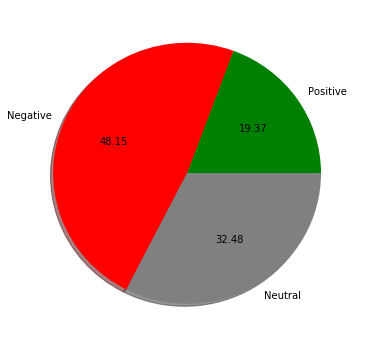

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.pie([counts[2],counts[0],counts[1]],labels=['Positive','Negative','Neutral'],colors=['g','r','gray'],shadow=True,autopct ='%.2f' )
fig = plt.gcf()
fig.set_size_inches(6,6)
fig.savefig('figure.pdf', bbox_inches='tight')

In [6]:
df['retweet_count'].unique()

array([0])

In [7]:
df['reply_count'].unique()

array([0])

In [8]:
df.drop(['retweet_count','reply_count'], axis=1)

,airline_sentiment,is_reply,text,tweet_coord,tweet_created,tweet_location,user_timezone
tweet_id,,,,,,,
942743012337123328,positive,False,"""Los pilotos de Ryanair desconvocan la huelga ...",NaN,2017-12-18 13:07:04,NaN,Dublin
926857871916183553,positive,True,"@Iberia @lavecinarubia Si ,por favor las decla...",NaN,2017-11-04 17:05:11,NaN,NaN
936979305720090626,neutral,True,@Iberia Me dirías por favor que costo tiene?,NaN,2017-12-02 15:24:09,NaN,NaN
943983853802328064,negative,True,"@SupermanlopezN @Iberia @giroditalia Champion,...",NaN,2017-12-21 23:17:43,NaN,Central Time (US & Canada)
938207464457211904,negative,True,@SrtaFarrellDM @KLM @Iberia Eso de avianca es ...,NaN,2017-12-06 00:44:25,NaN,Eastern Time (US & Canada)
931526746301714435,neutral,True,"@Iberia hola, no conozco mi numéro IBERIA PLUS...",NaN,2017-11-17 14:17:37,NaN,NaN
933385784228532233,neutral,False,El canal Smithsonian reconstruye en video el a...,NaN,2017-11-22 17:24:47,NaN,NaN
932856751099142144,positive,False,"Con @Iberia, mi destino a un solo click. ¡Dese...",NaN,2017-11-21 06:22:35,NaN,NaN
927623530585509889,negative,True,@facua Pueden ayudarme con una maleta perdida ...,NaN,2017-11-06 19:47:38,NaN,NaN


In [9]:
mask = df['tweet_coord'].isnull()
print("Num of non Nan positions:",len(df.tweet_coord) - len(df.tweet_coord[mask])) 

Num of non Nan positions: 22


In [10]:
df['tweet_coord'].unique()

array([nan, '[43.248521, -2.947576]', '[28.4380525, -16.3998475]',
       '[41.30112848, 2.07474354]', '[40.47222222, -3.56083333]',
       '[43.42319443, -3.82403537]', '[42.88277778, -2.72444444]',
       '[41.30218123, 2.07590243]', '[-0.13555556, -78.36555556]',
       '[43.36, -5.845]', '[37.18861111, -3.77722222]',
       '[40.5, -3.66666667]', '[43.31001, -8.37273]',
       '[38.7167, -9.13333]', '[40.49483116, -3.56685028]',
       '[43.301111, -2.910556]', '[41.795636, 12.252037]',
       '[4.71920636, -74.06686107]', '[39.62861111, -8.66527778]',
       '[45.7, 9.6667]'], dtype=object)

In [11]:
# Force the index to be the creation date
df_by_date = df.set_index('tweet_created')
# Select only airline_sentiment
df_date_sent = df_by_date[['airline_sentiment']]
# Create a one-hot encoding.
sent_onehot = pd.get_dummies(df_date_sent['airline_sentiment'])
sent_onehot.head()

,negative,neutral,positive
tweet_created,,,
2017-12-18 13:07:04,0,0,1
2017-11-04 17:05:11,0,0,1
2017-12-02 15:24:09,0,1,0
2017-12-21 23:17:43,1,0,0
2017-12-06 00:44:25,1,0,0


In [12]:
df.tweet_created

tweet_id
942743012337123328   2017-12-18 13:07:04
926857871916183553   2017-11-04 17:05:11
936979305720090626   2017-12-02 15:24:09
943983853802328064   2017-12-21 23:17:43
938207464457211904   2017-12-06 00:44:25
931526746301714435   2017-11-17 14:17:37
933385784228532233   2017-11-22 17:24:47
932856751099142144   2017-11-21 06:22:35
927623530585509889   2017-11-06 19:47:38
930719355704430592   2017-11-15 08:49:20
938115911084593153   2017-12-05 18:40:37
944883680970969088   2017-12-24 10:53:19
937549230994051073   2017-12-04 05:08:50
941081978807431169   2017-12-13 23:06:42
933352064910012416   2017-11-22 15:10:47
941598213106229248   2017-12-15 09:18:02
923921122495787008   2017-10-27 14:35:35
931611760829792256   2017-11-17 19:55:26
943844779976208384   2017-12-21 14:05:05
941121849366368258   2017-12-14 01:45:08
942150441445548032   2017-12-16 21:52:24
941436315547127809   2017-12-14 22:34:43
930553946023841794   2017-11-14 21:52:04
937424103488843776   2017-12-03 20:51:37
9232710

/Users/pere/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


Text(0.5,0,'Date')

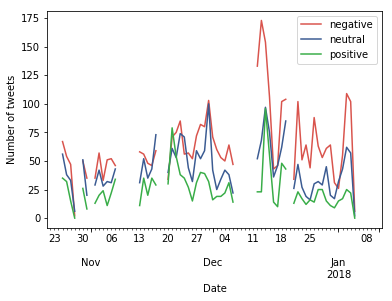

In [13]:
time_histogram = sent_onehot.groupby(pd.TimeGrouper('D')).sum()
import seaborn as sns
# Lines plot
ax = time_histogram.plot(color=[sns.xkcd_rgb["pale red"], 
                      sns.xkcd_rgb["denim blue"], 
                      sns.xkcd_rgb["medium green"]])
ax.set_ylabel('Number of tweets')
ax.set_xlabel('Date')

In [115]:
hours = []
for e in df.tweet_created:
    hours.append(e.hour)

In [120]:
date1 = df.tweet_created.values[0]

In [129]:
date1

numpy.datetime64('2017-12-18T13:07:04.000000000')

In [116]:
df['hours'] = pd.Series(hours, index=df.index)

In [117]:
df.index = pd.to_timedelta(df.hours)

In [118]:
df.head()

,airline_sentiment,is_reply,reply_count,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,hours
hours,,,,,,,,,,
00:00:00.000000,positive,False,0,0,"""Los pilotos de Ryanair desconvocan la huelga ...",NaN,2017-12-18 13:07:04,NaN,Dublin,13
00:00:00.000000,positive,True,0,0,"@Iberia @lavecinarubia Si ,por favor las decla...",NaN,2017-11-04 17:05:11,NaN,NaN,17
00:00:00.000000,neutral,True,0,0,@Iberia Me dirías por favor que costo tiene?,NaN,2017-12-02 15:24:09,NaN,NaN,15
00:00:00.000000,negative,True,0,0,"@SupermanlopezN @Iberia @giroditalia Champion,...",NaN,2017-12-21 23:17:43,NaN,Central Time (US & Canada),23
00:00:00,negative,True,0,0,@SrtaFarrellDM @KLM @Iberia Eso de avianca es ...,NaN,2017-12-06 00:44:25,NaN,Eastern Time (US & Canada),0


Text(0.5,0,'Hour')

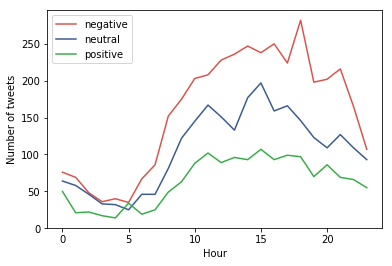

In [119]:
# Force the index to be the creation date
df_by_hours = df.set_index('hours')
# Select only airline_sentiment
df_hours_sent = df_by_hours[['airline_sentiment']]
# Create a one-hot encoding.
sent_hours_onehot = pd.get_dummies(df_hours_sent['airline_sentiment'])

hour_histogram = sent_hours_onehot.groupby('hours').sum()

import seaborn as sns
# Lines plot
ax = hour_histogram.plot(color=[sns.xkcd_rgb["pale red"], 
                      sns.xkcd_rgb["denim blue"], 
                      sns.xkcd_rgb["medium green"]])
ax.set_ylabel('Number of tweets')
ax.set_xlabel('Hour')

In [18]:
df['is_reply'].unique()

array([False,  True], dtype=bool)

In [19]:
df.groupby('is_reply').size()

is_reply
False    4076
True     3791
dtype: int64

/Users/pere/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  import sys


Text(0.5,0,'Date')

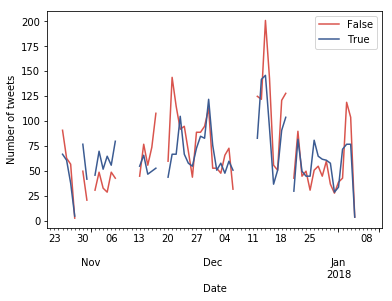

In [20]:
# Select only is_reply
df_date_sent = df_by_date[['is_reply']]
# Create a one-hot encoding.
sent_onehot = pd.get_dummies(df_date_sent['is_reply'])
sent_onehot.head()

time_histogram = sent_onehot.groupby(pd.TimeGrouper('D')).sum()

import seaborn as sns
# Lines plot
ax = time_histogram.plot(color=[sns.xkcd_rgb["pale red"], 
                      sns.xkcd_rgb["denim blue"]])
ax.set_ylabel('Number of tweets')
ax.set_xlabel('Date')

In [21]:
len(df['tweet_location'].unique())

230

In [22]:
len(df['user_timezone'].unique())

89

/Users/pere/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  import sys


Text(0.5,0,'Date')

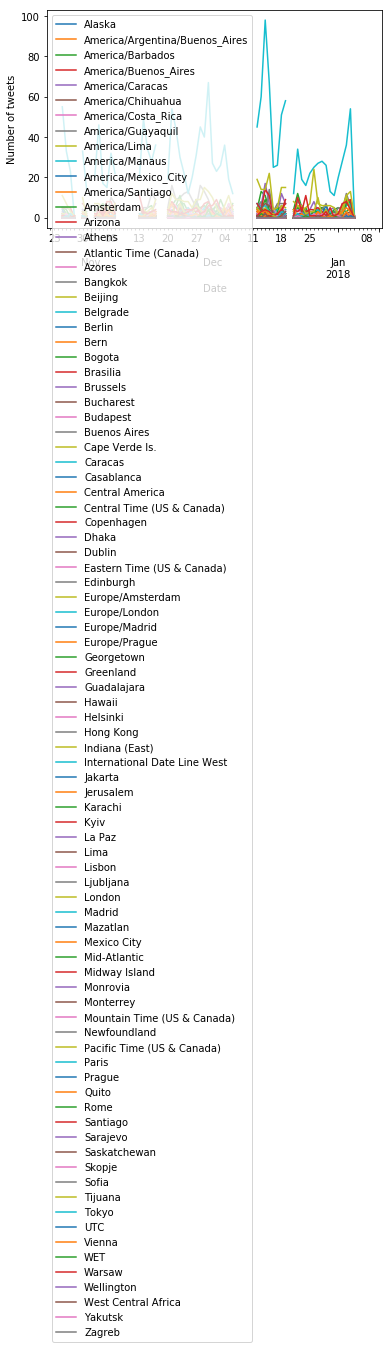

In [23]:
# Select only is_reply
df_date_sent = df_by_date[['user_timezone']]
# Create a one-hot encoding.
sent_onehot = pd.get_dummies(df_date_sent['user_timezone'])
sent_onehot.head()

time_histogram = sent_onehot.groupby(pd.TimeGrouper('D')).sum()

import seaborn as sns
# Lines plot
ax = time_histogram.plot()
ax.set_ylabel('Number of tweets')
ax.set_xlabel('Date')

In [24]:
#data = df['user_timezone']
#data.apply(pd.value_counts).plot(kind='bar', subplots=True)

In [25]:
from sklearn.model_selection import train_test_split
# Divide data in train and test
train, test = train_test_split(df, test_size=0.25)
print (len(train),len(test))

5900 1967


In [26]:
# Separate in groups
dfpo = df[df['airline_sentiment']=='positive']
dfng = df[df['airline_sentiment']=='negative']
dfne = df[df['airline_sentiment']=='neutral']

print(dfpo.shape,dfng.shape,dfne.shape)

(1524, 10) (3788, 10) (2555, 10)


Afegir airline a tweet, afegir-hi hora, afegir-hi dia de setmana

In [ ]:
airlines = []
for t in df.text.values:
    al_tweet = []
    tweet = t
    words = tweet.split()
    for w in words:
        if w[0] == "@":
            al_tweet.append(w[1:])
    airlines.append(al_tweet)

In [63]:
airlines = []
for t in df.text.values:
    tweet = t
    words = tweet.split()
    for w in words:
        if w[0] == "@":
            airlines.append(w[1:])

In [64]:
np.unique(airlines)

array(['', '/Ryanair', '007DoctorNo', ..., 'zoruabells', 'zrh_airport',
       'zumitropi'],
      dtype='<U29')

In [111]:
[print(w) for w in airlines if "panair" in w]

Spanair
Spanair


[None, None]

In [108]:
from collections import Counter

letter_counts = Counter(airlines)
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.sort_values(by=0, ascending=False)

,0
Iberia,3119
Ryanair,385
"Iberia,",364
Ryanair_ES,162
iberia,139
vueling,121
iberiaexpress,100
SamsungEspana,50
AirNostrumLAM,46
aena,42


In [90]:
letter_counts.values()

dict_values([3119, 10, 33, 19, 1, 2, 364, 8, 1, 139, 2, 3, 1, 1, 1, 1, 27, 1, 4, 7, 1, 46, 50, 1, 2, 1, 1, 5, 20, 21, 162, 4, 385, 5, 5, 5, 1, 1, 1, 6, 1, 1, 1, 42, 7, 4, 3, 121, 16, 1, 2, 24, 1, 36, 2, 1, 1, 1, 1, 4, 1, 1, 3, 15, 1, 11, 1, 11, 5, 5, 1, 2, 34, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 2, 2, 3, 10, 2, 2, 3, 1, 1, 15, 34, 9, 4, 1, 4, 6, 2, 1, 1, 5, 9, 8, 1, 10, 1, 100, 36, 7, 5, 5, 3, 8, 3, 1, 11, 1, 5, 1, 4, 1, 1, 1, 3, 3, 6, 1, 3, 1, 12, 7, 1, 2, 2, 4, 4, 2, 2, 4, 5, 1, 1, 1, 3, 1, 1, 1, 26, 1, 1, 6, 4, 5, 2, 6, 7, 8, 5, 2, 5, 5, 4, 7, 1, 1, 2, 8, 3, 2, 1, 1, 21, 1, 9, 20, 3, 3, 2, 8, 4, 4, 4, 4, 3, 1, 4, 6, 1, 1, 1, 1, 1, 11, 1, 7, 6, 1, 7, 2, 1, 1, 1, 1, 2, 1, 1, 17, 2, 5, 1, 1, 1, 1, 7, 7, 2, 12, 3, 2, 12, 2, 6, 4, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 10, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 20, 11, 8, 1, 8, 1, 1, 5, 1, 5, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 3, 1, 12, 16, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2

In [49]:
new_corpus = [' '.join('Ryanair') for tweet in df.text.values if 'yanair' in tweet.split()]

In [50]:
new_corpus

[]

In [51]:
df.text.values

array([ '"Los pilotos de Ryanair desconvocan la huelga tras ver reconocidos sus sindicatos" by El País via Últimas noticias… https://t.co/80Fz6dxP9t',
       '@Iberia @lavecinarubia Si ,por favor las declaraciones de amor entre los  #rubijarena no  pueden quedarse en una ma… https://t.co/GWKJGhhubY',
       '@Iberia Me dirías por favor que costo tiene?', ...,
       'Compré vuelos con @British_Airways. El vuelo es operado por @Iberia. Llamo a BA para añadir una maleta y me dicen q… https://t.co/HSUhcKH6Ie',
       '@miguelitoelcon1 @Fjlopezm @Iberia Muchas gracias Miguel Ángel!',
       'Ryanair abrirá en 2018 cuatro nuevas rutas desde Valencia, Alicante, Sevilla y Girona https://t.co/RzsnG7svht'], dtype=object)

In [52]:
len(airlines)

8947

In [53]:
len(df)

7867

In [54]:
kk = 'aixo es @una @prova @de @merda'

In [55]:
al = []
ws = kk.split()
for w in ws:
    if w[0] == '@':
        al.append(w[1:])

In [56]:
al

['una', 'prova', 'de', 'merda']

In [59]:
df['airline'] = airlines

In [60]:
df.airline.values

array([list([]), list(['Iberia', 'lavecinarubia']), list(['Iberia']), ...,
       list(['British_Airways.', 'Iberia.']),
       list(['miguelitoelcon1', 'Fjlopezm', 'Iberia']), list([])], dtype=object)

In [ ]:
al = ['Ryanair', 'Vueling', 'Iberia', 'AirEuropa']